In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Software Engineer Salaries.csv")
data

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
...,...,...,...,...,...,...
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN


In [3]:
data.shape

(870, 6)

In [5]:
data.isnull().sum()

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

In [6]:
data.dropna(inplace=True)
data

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
...,...,...,...,...,...,...
759,OpenAI,3.1,Apprentice ETL Software Engineer,"Elkridge, MD",30d+,$160K - $385K (Employer est.)
760,NCR Atleos,3.9,"Software Engineer, Tool & Infrastructure, Reli...","Palo Alto, CA",1d,$222K (Employer est.)
761,Electronic Warfare Associates,3.8,"Software Engineer, Engineering Acceleration","San Francisco, CA",5d,$82K - $118K (Glassdoor est.)
762,"BillGO, Inc.",3.3,ATM Software Engineer (Level III),"Frisco, TX",30d+,$69K - $107K (Glassdoor est.)


In [7]:
data.shape

(753, 6)

In [8]:
data.info

<bound method DataFrame.info of                            Company  Company Score  \
0                         ViewSoft            4.8   
1                          Workiva            4.3   
2       Garmin International, Inc.            3.9   
3                         Snapchat            3.5   
4    Vitesco Technologies Group AG            3.1   
..                             ...            ...   
759                         OpenAI            3.1   
760                     NCR Atleos            3.9   
761  Electronic Warfare Associates            3.8   
762                   BillGO, Inc.            3.3   
763                        Genesys            3.6   

                                             Job Title           Location  \
0                                    Software Engineer       Manassas, VA   
1                            Software Support Engineer             Remote   
2                                 C# Software Engineer           Cary, NC   
3    Software Engineer,

In [9]:
data.describe()

,Company Score
count,753.000000
mean,3.895618
std,0.526348
min,1.000000
25%,3.600000
50%,3.900000
75%,4.200000
max,5.000000


In [4]:
# data["Date"] = pd.to_datetime(data["Date"])
s = "Hello, World!"
print(s.split(","))

['Hello', ' World!']


Text(0.5, 1.0, 'frequeny of grouped Rating')

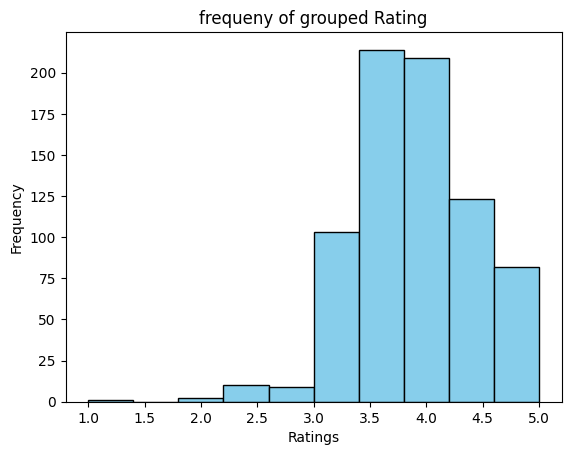

In [10]:
plt.hist( data["Company Score"], color='skyblue', edgecolor='black')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("frequeny of grouped Rating")


In [25]:
import re
def extract_salary(salary_str):
    # Use regex to find all numbers in the format '$xxK'
    numbers = re.findall(r'\$([0-9]+)K', salary_str)
    if numbers:
        # Convert to integers and calculate the average
        numbers = list(map(int, numbers))
        return sum(numbers) / len(numbers) * 1000  # Multiply by 1000 to convert 'K' to actual number
    return None

# Apply the function to extract and calculate the average salary
data['Average Salary'] = data['Salary'].apply(extract_salary)
data.dropna(inplace=True)

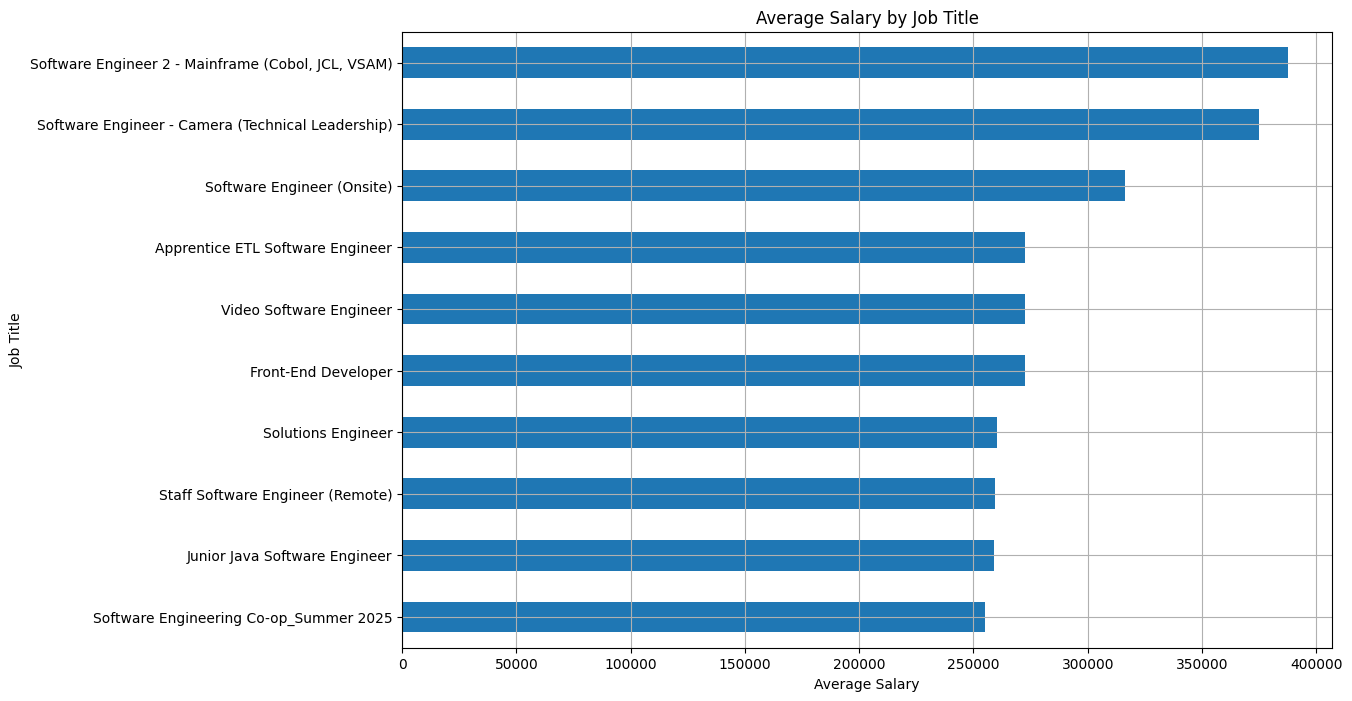

In [27]:
plt.figure(figsize=(12, 8))
salary_avg = data.groupby('Job Title')['Average Salary'].mean().sort_values()
salary_avg = salary_avg[-10:]
# print(salary_avg)
salary_avg.plot(kind='barh')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.grid(True)
plt.show()

In [15]:
data['Days_Ago'] = data['Date'].str.extract(r'(\d+)').astype(int)

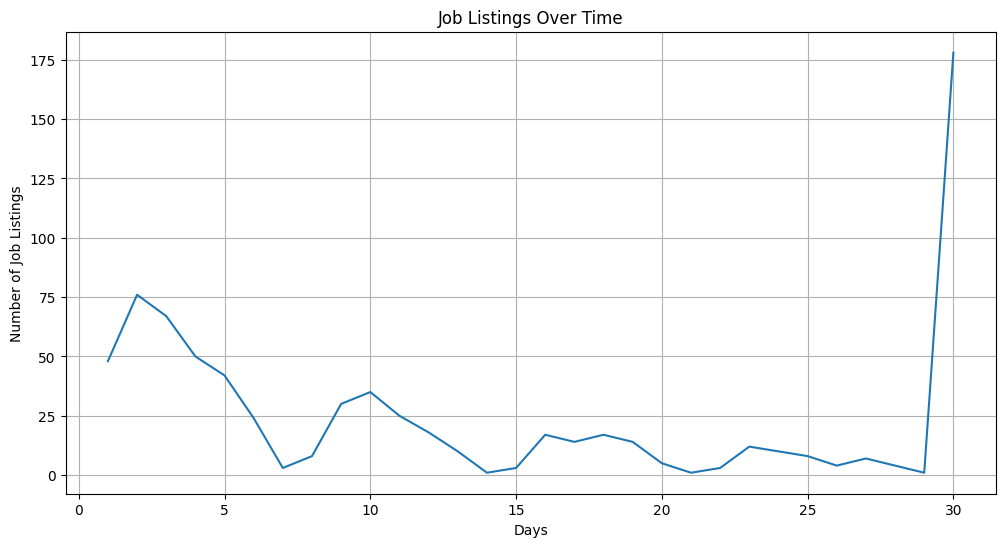

In [28]:
plt.figure(figsize=(12, 6))
data['Days_Ago'].value_counts().sort_index().plot(kind='line')
plt.title('Job Listings Over Time')
plt.xlabel('Days')
plt.ylabel('Number of Job Listings')
plt.grid(True)
plt.show()


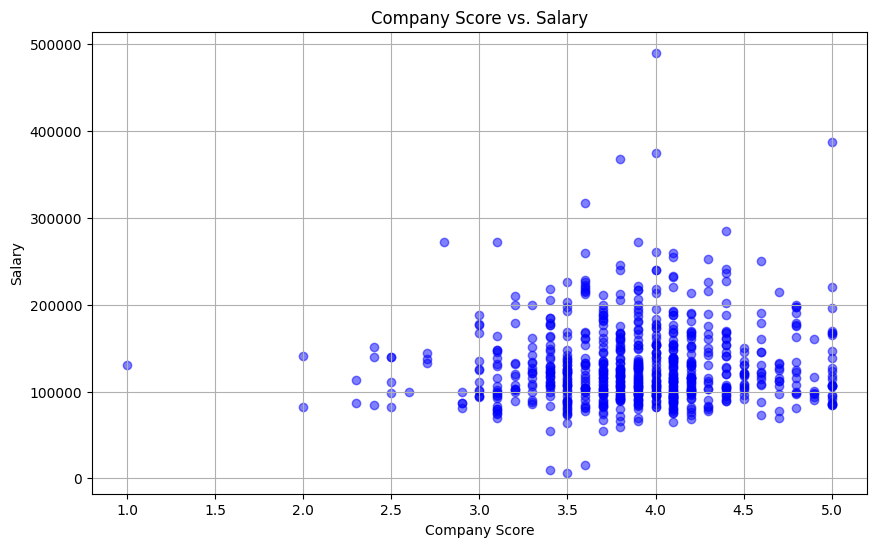

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Company Score'], data['Average Salary'], c='blue', alpha=0.5)
plt.title('Company Score vs. Salary')
plt.xlabel('Company Score')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


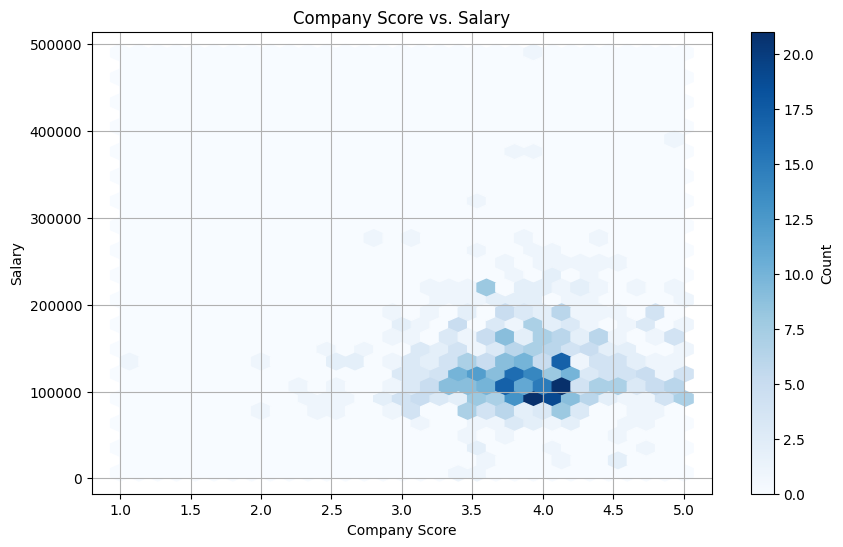

In [65]:
plt.figure(figsize=(10, 6))
plt.hexbin(data['Company Score'], data['Salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Company Score vs. Salary')
plt.xlabel('Company Score')
plt.ylabel('Salary')
plt.grid(True)
plt.show()